In [1]:
import tensorflow as tf
import numpy as np

# Introduction to neural network classification with TensorFlow

- In this notebook we're going to learn how to write neural networks for classification problems.
`Classification problem` is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

- Our data is a little hard to understand right now.. Let's visiualize..

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


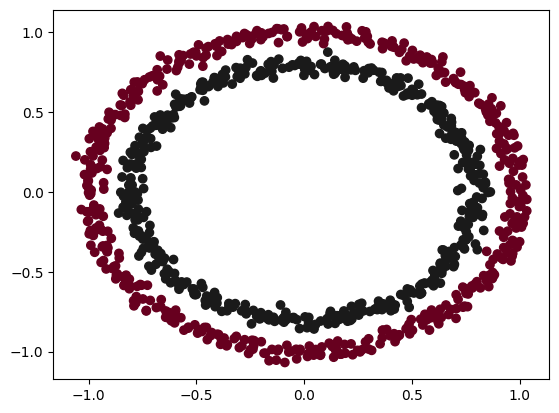

In [6]:
# Visualize the plot
import matplotlib.pyplot as plt

plt.scatter(circles.X0, circles.X1, c=y, cmap=plt.cm.RdGy)

## Input and output shapes

In [7]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

In [8]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create or import a model
model_1 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation="ReLu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_1.fit(X,y, epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.7730 - accuracy: 0.4540
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.5316 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7483 - accuracy: 0.4870
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4950


In [9]:
# Let's try to improve our model by training for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy, it is performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 6.1606 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4937 - accuracy: 0.5250
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.4595 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [11]:
# model_2.1

model_2_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2_1.fit(X, y, epochs=100, verbose=0)
model_2_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5010


[0.6952654123306274, 0.5009999871253967]

In [12]:
# Let's visualize our model
# Take in a trained model, X, y
# Create a meshgrid of different X values
# Plot the predictions as well as line between zones

def plot_decision_boundary(model, X ,y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  # meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)


  # Plotting
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

313/313 [==============================] - 1s 2ms/step
doing binary classification


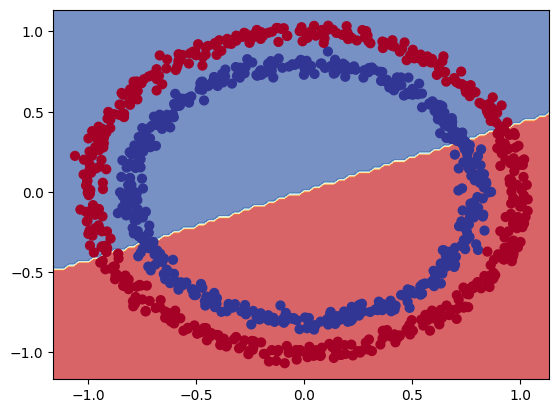

In [13]:
# Check out the predictions of our model is making

plot_decision_boundary(model_2_1, X=X, y=y)

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers, increase the number hidden units within a layer.
2. Compiling a model - we might choose to a different optimization function such as Adam,
3. Fitting a model - we might fit our model for more epochs

### Common ways to improve a deep model:


1. `Adding layers`
2. `Increase the number of hidden units`
3. `Change the activation functions`
4. `Change the optimization functions`
5. `Change the learning rate`
6. `Fitting on more data`
7. `Fitting for longer`



In [14]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


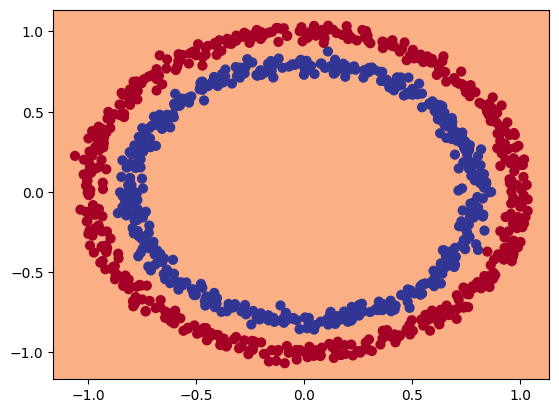

In [16]:
plot_decision_boundary(model_3, X=X, y=y)

## The missing piece is Non-Linearity



In [17]:
tf.random.set_seed(42)

# 1. Create the model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),
])

# 2. Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=0)
model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 4.6144 - accuracy: 0.4720


[4.614449501037598, 0.47200000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classification


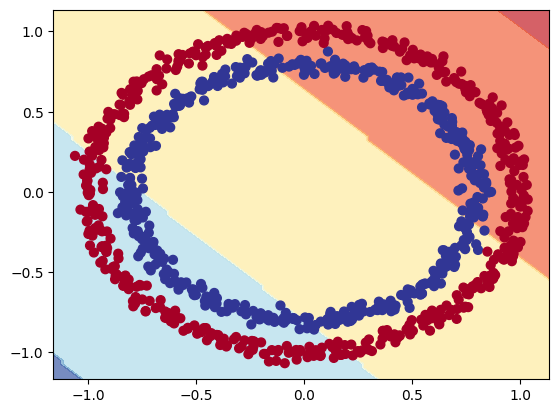

In [18]:
plot_decision_boundary(model_4, X=X, y=y)

### Let's try build our neural network with a non-linear activation function.

In [19]:
"""
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
model_5.fit(X,y, epochs=2000, verbose=0)
model_5.evaluate(X, y)
"""

'\nmodel_5 = tf.keras.Sequential([\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(1)\n])\n\nmodel_5.compile(\n    loss="binary_crossentropy",\n    optimizer=tf.keras.optimizers.Adam(lr=0.001),\n    metrics=["accuracy"]\n)\nmodel_5.fit(X,y, epochs=2000, verbose=0)\nmodel_5.evaluate(X, y)\n'

In [20]:
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_5.fit(X,y, epochs=100, verbose=0)

# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000


[0.01545022800564766, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


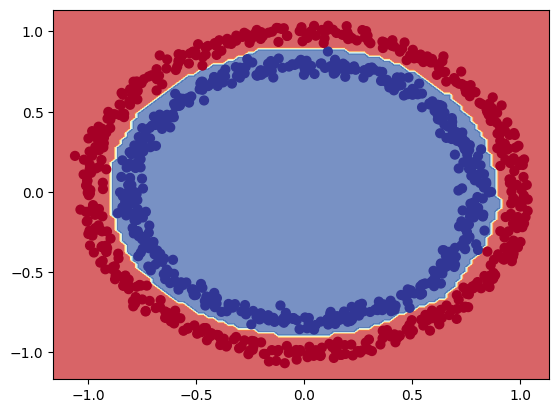

In [21]:
plot_decision_boundary(model_5, X, y)

**!** The combination linear and non-linear functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear function, let's see them in action.

In [22]:
# Create a tensor

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

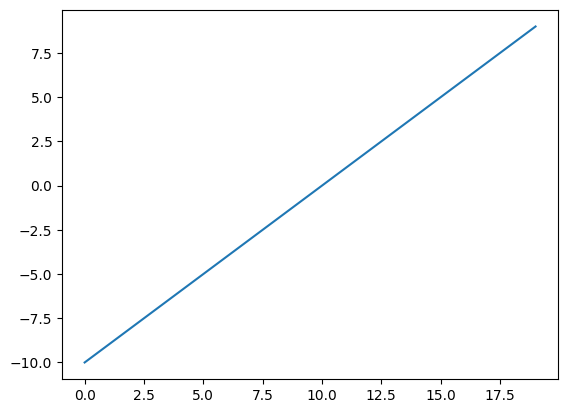

In [23]:
plt.plot(A)

In [24]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))


# Use the sigmoid
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

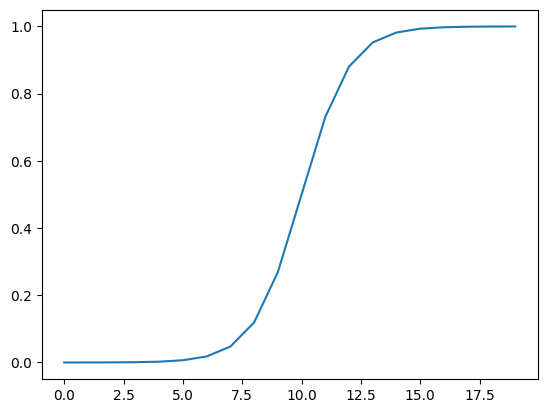

In [25]:
plt.plot(sigmoid(A))

when we need to draw non-straigt line pattern, we can do it with sigmoid function.

In [26]:
# Let's create ReLu function
def relu(x):
  return tf.maximum(0, x)


# Use the relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

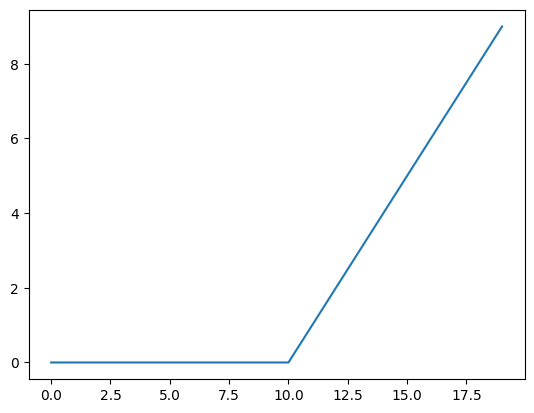

In [27]:
plt.plot(relu(A))

In [28]:
# Let's try activation functions
print(tf.keras.activations.linear(A))

# Does linear activation function change anything? - no
print(A == tf.keras.activations.linear(A))

tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True], shape=(20,), dtype=bool)


## Evaluating and improving our classification

So far we've been training and testing on the same datasets..
However, in machine learning this is a basically sin.

So let's create a training and test set.


In [29]:
# We can use indexing or scikit-learn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [30]:
# Let's create a model to fit on the training data and evaluate on test

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
    )

history = model_6.fit(X_train, y_train, epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6958 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4850
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5050
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5362
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5088
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5587
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5788
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5813
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6000
Epoch 11/25
25/25 [

In [31]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.9750


[0.4764691889286041, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification


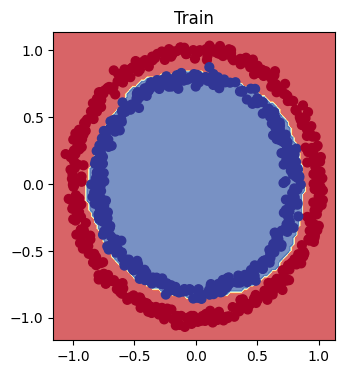

313/313 [==============================] - 0s 1ms/step
doing binary classification


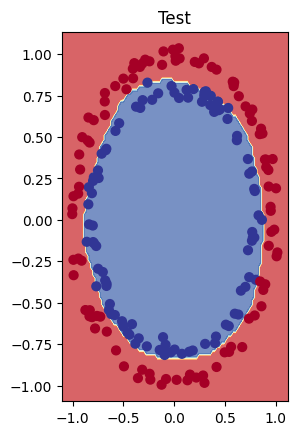

In [32]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [33]:
# Convert to history object into a DataFrame

dt = pd.DataFrame(history.history)
dt

,loss,accuracy
0,0.695848,0.50250
1,0.691875,0.48500
2,0.688464,0.50500
3,0.686796,0.53625
4,0.684050,0.53250
5,0.681247,0.50875
6,0.678077,0.55875
7,0.674679,0.57875
8,0.671892,0.58125
9,0.667849,0.60000


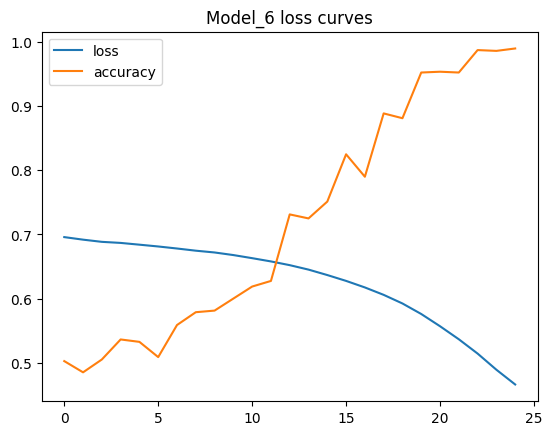

In [34]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")
plt.show()

- For many problems, the loss function going down means the model is improving (the prediction it's making are getting closer to the ground truth labels).

## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during traning) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here.)
* A modified loss curves plot.

In [35]:
# Set the random seed
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning rate callback

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

# Fit the model

history_7 = model_7.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 0, 'epochs')

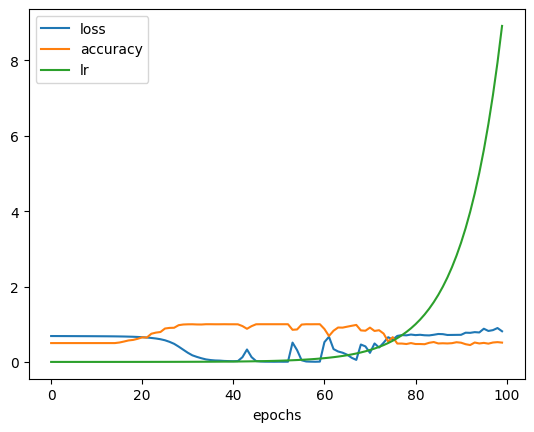

In [36]:
# Check out the history

hist_9_dt = pd.DataFrame(history_7.history)
hist_9_dt.plot()
plt.xlabel("epochs")

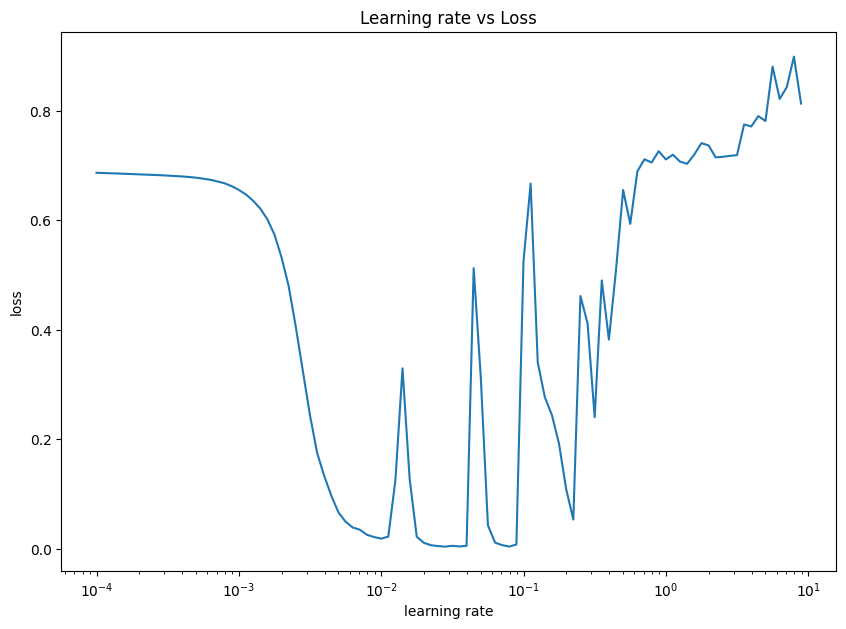

In [37]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, hist_9_dt.loss)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")
plt.show()

- we can try 0.009>

In [38]:
# Let's try using a higher *ideal* learning rate with the same model as before

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=["accuracy"]
)

history_8 = model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6888 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5100
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5213
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5462
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5362
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5400
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5925
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6162
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6350
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6525
Epoch 11/20
25/25 [

In [39]:
# Evaluate model_8

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.9350


[0.5462831854820251, 0.9350000023841858]

In [40]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4765 - accuracy: 0.9750


[0.4764691889286041, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification


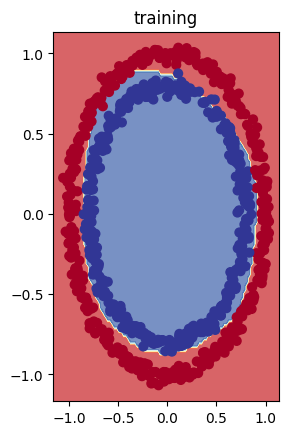

313/313 [==============================] - 1s 2ms/step
doing binary classification


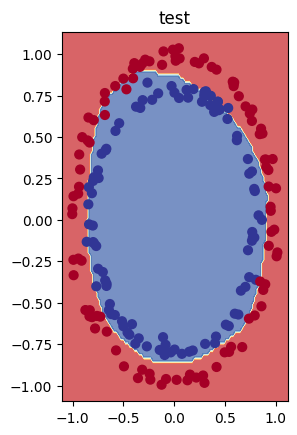

In [41]:
# Plot the decision boundraies for traning and test sets
plt.subplot(1,2,1)
plt.title("training")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8, X_test, y_test)

# More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods&metrics that you should be familiar with:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion-matrix
6. Classification report (from scikit-learn)

* `True Positive`: model predicts 1 when truth is 1
  * Reality: A wolf threatened.
  * Sharped said: Wolf!
  * Outcome: Sharped is a hero.
* `False Positive`: model predicts 1 when truth is 0
  * Reality: No wolf threatened.
  * Sharped: Wolf!
  * Outcome: Sharped is a liar.

* `True Negative`: model predicts 0 when truth is 0
  * Reality: No wolf threatened.
  * Sharped: No wolf.
  * Outcome: Sharped is a hero.

* `False Negative`: model predicts 0 when truth is 1
  * Reality: A wolf threatened.
  * Sharped: No wolf.
  * Outcome: Sharped is a liar.



In [42]:
# Check the accuracy of our mdoel

loss, accuracy = model_8.evaluate(X_test, y_test)

print("Model loss on the test set: {}".format(loss))
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.9350
Model loss on the test set: 0.5462831854820251
Model accuracy on the test set: 93.50%


In [43]:
# How about a confusion matrix ?
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))
# We rounded it bcs our predictions were like 0.3, 0.95, 0.125 and we needed to just 1 or 0


7/7 [==============================] - 0s 2ms/step


array([[96,  4],
       [ 9, 91]])

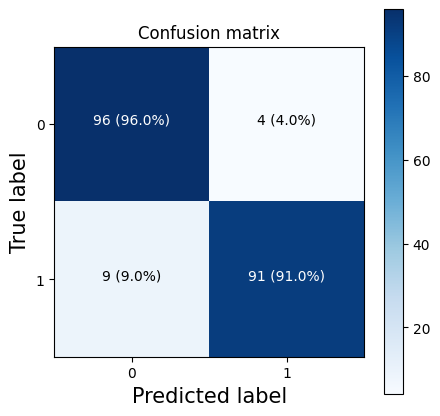

In [44]:
# How about we pretty our confusion matrix ?

import itertools

figsize = (5, 5)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our cf matrix
n_classes = cm.shape[0]


# Let's prettify it
fig, ax = plt.subplots(figsize= figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes=False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)

# Set the threshold for different colors
th = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({(cm_norm[i, j]*100):.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > th else "black",
           size=10)



## Precision

- Higher precision leads to less false positives.

Precision = tp / (tp + fp)

## Recall
- Higher recall leads to less false negatives

Recall = tp / (tp + fn)

## F-1 score
- Combination of precision and recall, usually a good overall metric for a classification model.

F1 = 2 * (precision x recall) / (precision + recall)

In [45]:
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model

model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy",
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.F1Score()
             ]
)

# 3. Fit the model
model_10.fit(X_train, tf.cast(y_train, tf.float32) , epochs = 50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.4900 - precision: 0.4914 - recall: 0.5700 - f1_score: 0.6667
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5113 - precision: 0.5113 - recall: 0.5100 - f1_score: 0.6667
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5225 - precision: 0.5148 - recall: 0.7825 - f1_score: 0.6667
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5412 - precision: 0.5261 - recall: 0.8300 - f1_score: 0.6667
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5800 - precision: 0.5769 - recall: 0.6000 - f1_score: 0.6667
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6250 - precision: 0.5947 - recall: 0.7850 - f1_score: 0.6667
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.58